In [1]:
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')

In [2]:
# plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
import pandas.io.data as web
#from pandas_datareader import data as web
import pandas_datareader as pdr

In [4]:
#pdr.get_data_yahoo('NIFTYBEES.NS')
NB = web.DataReader(name='NIFTYBEES.NS', data_source='yahoo',start='2008-1-1')
NB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1925 entries, 2008-01-01 to 2016-07-15
Data columns (total 6 columns):
Open         1925 non-null float64
High         1925 non-null float64
Low          1925 non-null float64
Close        1925 non-null float64
Volume       1925 non-null int64
Adj Close    1925 non-null float64
dtypes: float64(5), int64(1)
memory usage: 105.3 KB


In [5]:
NB['Change'] = np.log(NB['Open'] /NB['Close'].shift(1))

In [6]:
NB['Volume']=NB['Volume']/pd.rolling_mean(NB['Volume'],10)

In [7]:
NB['Volatility']=NB['Close'].apply(lambda x: np.log(x))/pd.rolling_std(NB['Close'],21)

In [9]:
import TA# self made python file at PyCON16 folder for TA
#https://mrjbq7.github.io/ta-lib/func.html
import talib

In [10]:
NB['momentum'] = talib.MOM(np.asarray(NB['Close']), timeperiod=5)

In [11]:
NB['RSI'] = talib.RSI(np.asarray(NB['Close']), timeperiod=14)

In [18]:
NB=NB.dropna()

In [19]:
X=NB[['Volume','Volatility','momentum','RSI']]

In [20]:
y=NB[['Change']]

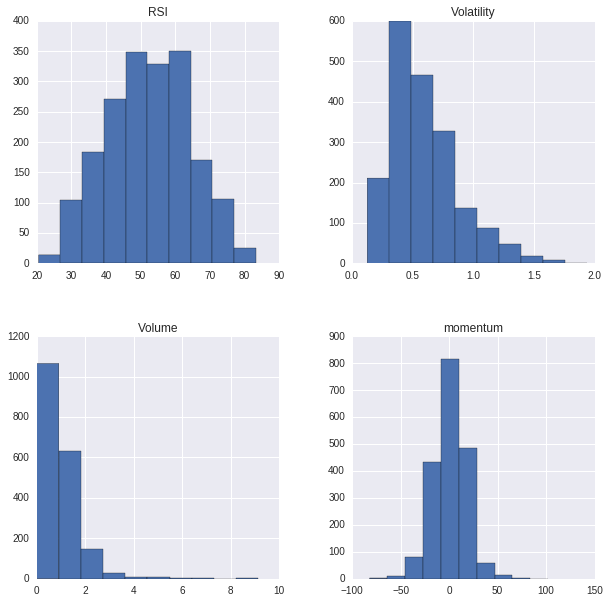

In [21]:
pd.DataFrame.hist(X, figsize = [10,10]);

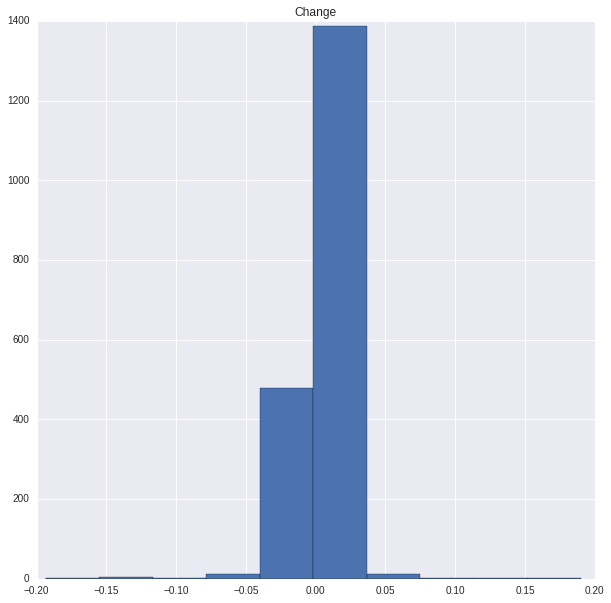

In [22]:
pd.DataFrame.hist(y, figsize = [10,10]);

In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1]:
from sklearn.svm import SVR
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)
y_poly = svr_poly.fit(X_train, y_train).predict(X_test)                                                                      

NameError: name 'X_train' is not defined

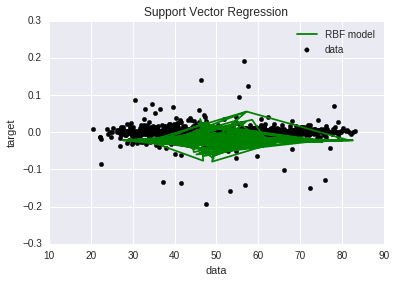

In [31]:
# look at the results
plt.scatter(X['RSI'], y, c='k', label='data')
plt.hold('on')
plt.plot(X_test['RSI'], y_rbf, c='g', label='RBF model')
#plt.plot(X_test['RSI'], y_lin, c='r', label='Linear model')
#plt.plot(X_test['RSI'], y_poly, c='b', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

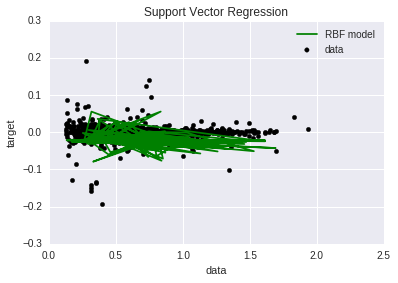

In [48]:
# look at the results
plt.scatter(X['Volatility'], y, c='k', label='data')
plt.hold('on')
plt.plot(X_test['Volatility'], y_rbf, c='g', label='RBF model')
#plt.plot(X_test['Volatility'], y_lin, c='r', label='Linear model')
#plt.plot(X_test['Volatility'], y_poly, c='b', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [63]:
X.tail(1)

,Volume,Volatility,momentum,RSI
Date,,,,
2016-07-15,0.627615,0.452437,22.6,71.959192


In [64]:
svr_rbf.fit(X_train, y_train).predict(X.tail(1))

/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


array([-0.02286489])

Linear regression

In [65]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [66]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
print(regr.coef_)

[[ -9.45634767e-04   1.35543783e-03   9.39333463e-05  -7.64838636e-05]]


In [68]:
#regr.predict(X_test)

In [69]:
regr.score(X_test,y_test) # is there linear relation?

-0.029258481093853206

In [72]:
# The mean square error
np.mean((regr.predict(X_test)-y_test)**2)

Change    0.00009
dtype: float64

In [74]:
import pylab as pl 
pl.figure()

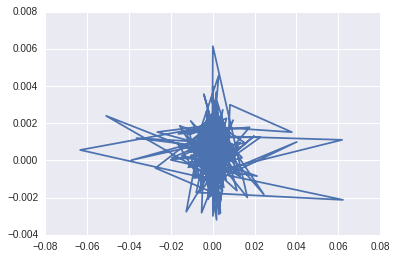

In [78]:
plt.plot(y_test, regr.predict(X_test))

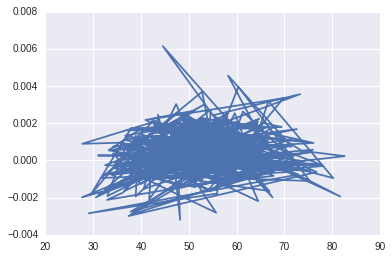

In [79]:
plt.plot(X_test['RSI'], regr.predict(X_test))

In [70]:
svr_rbf.score(X_test,y_test)

-7.3119733682153729